<font size="6">Lesson 4: Overfitting and Underfitting</font>

Readings:
- [Chapter 5.2](http://www.deeplearningbook.org/)
- [L1/L2 regularization](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

- import what you need

In [1]:
# import what you need
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from implements_04.functions_04 import *

<font size="5">Overviews</font>
1. Introduction
1. Flow
1. Underfitting
1. Overfitting
1. Regularization
1. Summary

---

# Introduction
In this notebook, we want to explain **Underfitting** and **Overfitting**. As [this renowned book](http://www.deeplearningbook.org/contents/ml.html) says, 
> Underfitting: the model is not able to obtain a sufficiently low error value on the training set \
> Overfitting: the gap between the training error and test error is too large

In other words, underfitting is not enough to be optimized on the training data, and overfitting is the model learned on the training dataset in an unexpected way. I will explain the detail in its section. In this notebook, I'll show the shorten code, so if you want to know the full code, please visit `implements_04/functions_04.py`

---
# Flow
First of all, I'm going to explain how I trained/processed the model.

## Data
I assumed the training data generated by the distribution based on $y=x^2$, and there's no noise in it.
$$
y = x^2
$$

Text(0, 0.5, 'y')

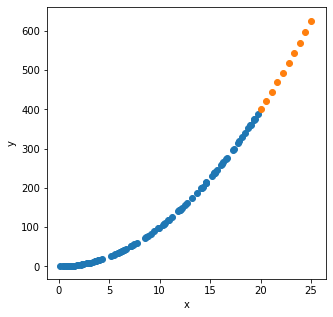

In [9]:
# data preparation
x, y, x_test, y_test = data_generator(num=100, test_num=10)

# data visualization
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")

## Polynomial Regression
In this experiment, mean squared error (MSE) is employed as a loss function, and it is defined as:
$$
MSE(y_{pred}, y_{true}) = \sqrt{\frac{1}{n}\sum_{l=1}^n (y_{pred}-y_{true})^2}
$$

Where $n$ is \# of data, $y_{pred}$ is predicted output "y", $y_{true}$ is given(true) output "y".

<img src="implements_04/image/MSE.jpg" width="500">

---

Linear regression is the simplest model for machine learning. y is predicted using formula below:
$$
y_{pred} = a_0 + a_1x
$$

Where $a_i$ is a trainable coefficient and $x$ is a valuable.

---

In this notebook, I included polynomial regression as well. y is predicted using formula below:

$$
y_{pred} = \sum_{l=0}^n a_l x^l \\
y_{pred} = a_0 + a_1x + a_2x^2 + a_3x^3 .... + a_nx^n
$$

Where $n$ is degree and indicates the complexity(ability) of the model.

In [10]:
#--- parameter ---#
degree = 8 # degree of polynomial fuction, complexity of the model.
#-----------------#

# Define model
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = LinearRegression()

# train the model on the training dataset
x_ = pf.fit_transform(x)
model.fit(x_, y)
print()

In [11]:
# observe the error on the training set
print()
x_ = pf.fit_transform(x)
y_pred = model.predict(x_)
print(f"train loss: {mse(y_pred, y)}")

print()
# observe the error on the test set
x_ = pf.fit_transform(x_test)
y_pred = model.predict(x_)
print(f"test loss: {mse(y_pred, y_test)}")


train loss: 7.668270797484276e-13

test loss: 1.3369408900167282e-11


In [12]:
# observe the coefficient of the predicted fuction
print()
data = []
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

coef = np.reshape(model.coef_.reshape(-1), (1, -1))
for i in range(coef.shape[1]):
    print(f"coefficient {i+1} = {coef[0,i]}")


coefficient 1 = 5.458695455220796e-07
coefficient 2 = 0.9999999093649081
coefficient 3 = 8.171118751895403e-09
coefficient 4 = -2.257908092808715e-10
coefficient 5 = -9.606925227122892e-12
coefficient 6 = 6.616538913983838e-13
coefficient 7 = -9.26342336171615e-15
coefficient 8 = 0.0


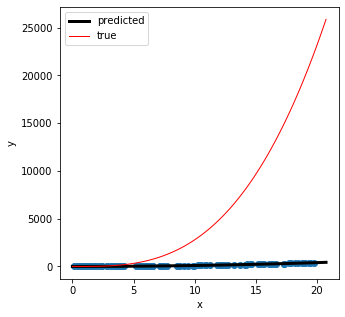

In [13]:
# visualization of the predicted and true function
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(line, y_predict, c="black", label="predicted", linewidth=3)
plt.plot(line, y_true, c="red", label="true", linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

---

# Underfitting
This problem is very simple, the determined model doesn't have enough complexity/capability to solve a certain problem.
- **picture of the underfitting**

In [15]:
# define parameters
training_num = 100
degree = 1 # 1 means linear regression

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 29.50412082155759
test error : 136.5942047952198


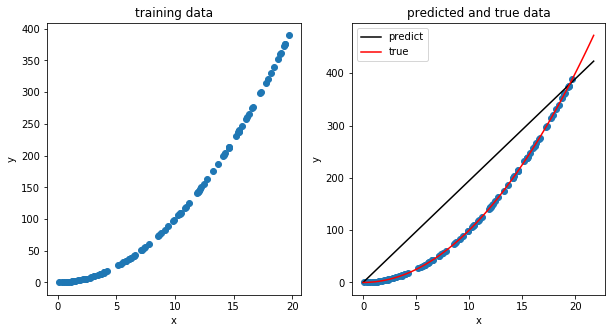

In [16]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> as you can see, by using linear regression, you cannot train properly.

---

# Overfitting
- the main purpose of machine learning is to predict data from only existing data (data you have).
- in other words, we have only the training data.
- it causes the model to have learned features from the training data that are specific to it.
- it is called **Overfitting** in this field, in Japanese we call it "過学習" and it is kind of "深読み" or "偏見" for our real world.


- There are two factors that lead to Overfitting.
    - lack of the number of training data
    - the complexity of the model is too high compared to the complexity of the training set.
        - \* "the complexity of the model" = "how smart the model is"
        
        
- I will explain three way to prevent it.
    - Prepare much training data as possible.
    - Prepare the model whose capacity fits the complexity of the data.
        - Employ Regularization

## Prepare Much Training Data as Possible

### lack of training data

In [17]:
# define parameters
training_num = 5
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.5587146697450483e-11
test error : 6328.882242523441


In [18]:
coef_visualizer(model)

coefficient 1 = 1.135486970330038e-05
coefficient 2 = 0.00010244744972044662
coefficient 3 = 0.0006543689837788171
coefficient 4 = 0.00317272401800784
coefficient 5 = 0.009435267575543195
coefficient 6 = -0.0017050880140254039
coefficient 7 = 0.00010413895106133041
coefficient 8 = -2.1370853278777e-06


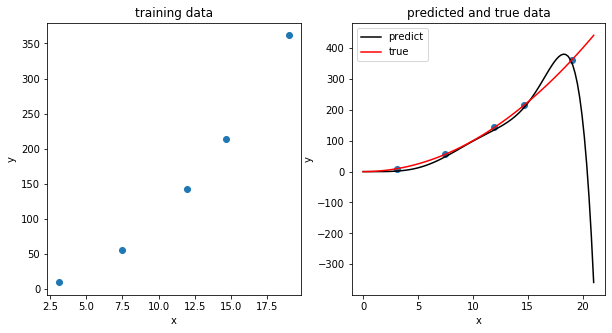

In [19]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> the train loss is very low and the test loss is very high. \
--> it means the model is overfitting as the definition. \
--> there are wide range of the coefs that work properly on "training set", because the training set has only 5 plots. \
--> so the model chose the coefs that reduce the train loss as possible.

---

### Plentiful training data

In [20]:
# define parameters
training_num = 100
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 8.756866333046472e-07
test error : 3.656420230248061e-06


In [21]:
coef_visualizer(model)

coefficient 1 = 5.458695455220796e-07
coefficient 2 = 0.9999999093649081
coefficient 3 = 8.171118751895403e-09
coefficient 4 = -2.257908092808715e-10
coefficient 5 = -9.606925227122892e-12
coefficient 6 = 6.616538913983838e-13
coefficient 7 = -9.26342336171615e-15
coefficient 8 = 0.0


---
---> coefficient 2 indicates the coef of the $x^2$, and it was nearly 1 and the others result in 0.\
---> it means the model could train successfully.
---

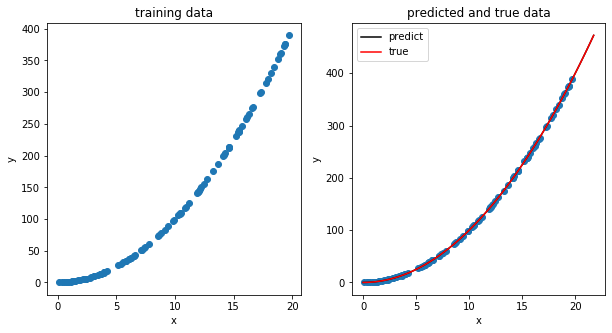

In [22]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> even if the model has the same complexity as the previous model. \
--> this model could train properly. \
--> the model wouln't choose kind of the previous model's coefs.

---

## Prepare the model whose capacity fits the complexity of the data.
- to prevent overfitting, using the model with lower complexity is also important.

### the model with high capacity

In [23]:
# define parameters
training_num = 10000
degree = 15

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 3.427444108947902
test error : 200097.68596358525


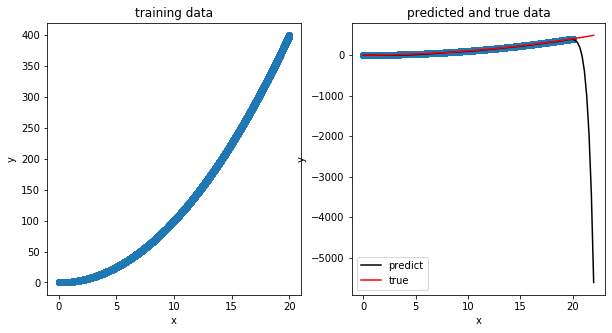

In [24]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> overfitting occurs. \
---> this model's problem is almost same as previous section. \
---> choosing the model with high capacity means increasing the coefs that is plausible for the training set.\
---> so the model chose the coefs that reduce the train loss as possible.

---

### the model with low capacity

In [25]:
# define parameters
training_num = 10000
degree = 5

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.5042344146390302e-10
test error : 6.264395805845841e-10


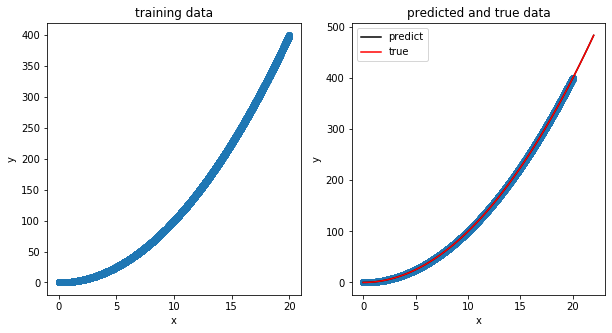

In [26]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> using the model with lower capacity works properly to prevent overfitting

---

# Regularization
- in reality, we can't determine the complexity of the training set prefectly.
- in that case, you can use a regularization for the purpose of restriction of the complexity of the model.
- one of the ways to do it is restricting the weight(parameter, coef) of the model to small.

<img src="implements_04/image/L1L2_regularization.png">

- [reference of this image](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

In [27]:
from sklearn.linear_model import Ridge, Lasso

## Ridge Regression (L2 regularization)
- in this model, restriction of the weight-squared is employed.
- the loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|^2
$$
- where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [28]:
# define parameters
training_num = 10000
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Ridge(alpha=1, random_state=42) # Ridge model
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Ridge : train error: {train_error}")
print(f"Ridge : test  error: {test_error}")

Linear: train error: 0.4811163256011891
Linear: test  error: 13341.028490773904

Ridge : train error: 0.653353488369182
Ridge : test  error: 218.26660018366138


In [29]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.00333878378986772
coefficient 2 = 0.010010801856333932
coefficient 3 = 0.034731804805061384
coefficient 4 = 0.06852099092697793
coefficient 5 = 0.06560095719168745
coefficient 6 = -0.04593449881257974
coefficient 7 = 0.012002012255018828
coefficient 8 = -0.001740082254282565
coefficient 9 = 0.00015543858465097172
coefficient 10 = -8.78466136388007e-06
coefficient 11 = 3.069270538474592e-07
coefficient 12 = -6.062915287765973e-09
coefficient 13 = 5.185530997653398e-11

- coefficient of the model with regularization
coefficient 1 = 0.2377015360683259
coefficient 2 = 0.5458750343637958
coefficient 3 = 0.5973217089202415
coefficient 4 = -0.31240769242807753
coefficient 5 = 0.09325456022092078
coefficient 6 = -0.018045346130760892
coefficient 7 = 0.002383820062799555
coefficient 8 = -0.0002192205220045922
coefficient 9 = 1.4030314183025297e-05
coefficient 10 = -6.127877294369823e-07
coefficient 11 = 1.7414759536263613e-08
coefficient 12 

---

---> this loss function tends to make the weights smaller.

---

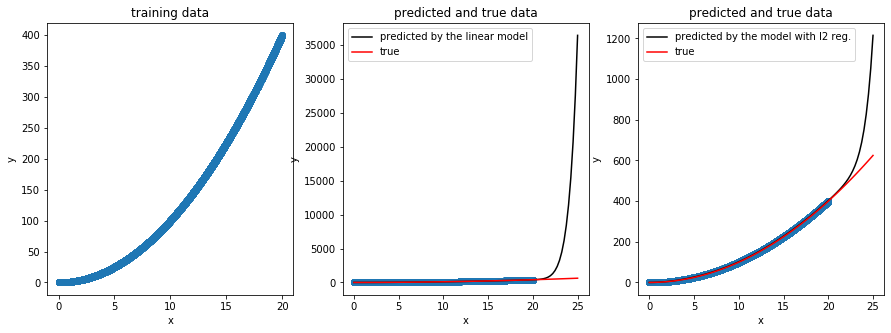

In [30]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l2 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

## Lasso Regression (L1 regularization)
- in this model, restriction of the weight's norm is employed.
- the loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|
$$
- where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [31]:
# define parameters
training_num = 100
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Lasso(alpha=10, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Lasso : train error: {train_error}")
print(f"Lasso : test  error: {test_error}")

Linear: train error: 0.4699732867682713
Linear: test  error: 17787.135474913393

Lasso : train error: 168.19553478116973
Lasso : test  error: 130.14134344510342


In [32]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.003996288012742519
coefficient 2 = 0.011121816236893966
coefficient 3 = 0.03936707821870707
coefficient 4 = 0.07499496099149754
coefficient 5 = 0.06878618014474233
coefficient 6 = -0.04997998965648272
coefficient 7 = 0.013331161575165357
coefficient 8 = -0.001963783336850923
coefficient 9 = 0.00017777764965149327
coefficient 10 = -1.0165185241184013e-05
coefficient 11 = 3.589180529052545e-07
coefficient 12 = -7.158951193680409e-09
coefficient 13 = 6.178760801611727e-11

- coefficient of the model with regularization
coefficient 1 = 0.0
coefficient 2 = 0.8503269144196907
coefficient 3 = 0.01743334791766622
coefficient 4 = -0.0003430637895938711
coefficient 5 = -1.0271301099800755e-05
coefficient 6 = -1.7759781940764017e-07
coefficient 7 = -9.564461388106215e-10
coefficient 8 = 1.2538821180175236e-10
coefficient 9 = 9.115174260907003e-12
coefficient 10 = 4.49286745646264e-13
coefficient 11 = 1.855231767519237e-14
coefficient 12 = 6.56

---

---> this tends to replace 0 on some weight parameters instead of reduce the norm of the parameter. \
---> "feature selection"

---

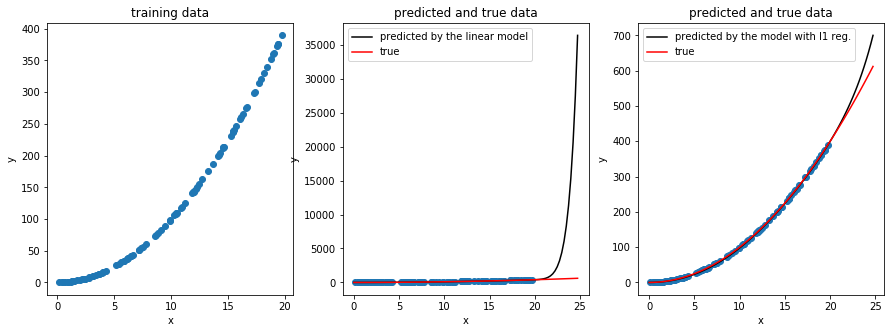

In [33]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l1 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> it seems to have better result in Lasso in this training set\
---> it is because this training set is sampled by $y=x^2$ so that it originally has an only one coef.\
---> thats why eliminating the weights is superior to reducing the weight-norm.

---

# Summary

- I have demonstrated the some problems of the machine learning, underfitting and overfitting.
- as a result, the important ways of preventing those problems are as follows:
    - using big training dataset as possible.
    - using the model with moderate complexity.
    - using regularization
- I only used two regularization, but there are lots of regularization as well.